In [8]:
translations = {
    "AGE": "age",
    "PTGENDER": "gender",
    "PTEDUCAT": "education",
    "PTETHCAT": "ethnicity",
    "PTRACCAT": "race",
    "PTMARRY": "marriage",  
}
def translate_line(line):
    for key in translations.keys():
        if key in line:
            line = line.replace(key, translations[key])
    return line

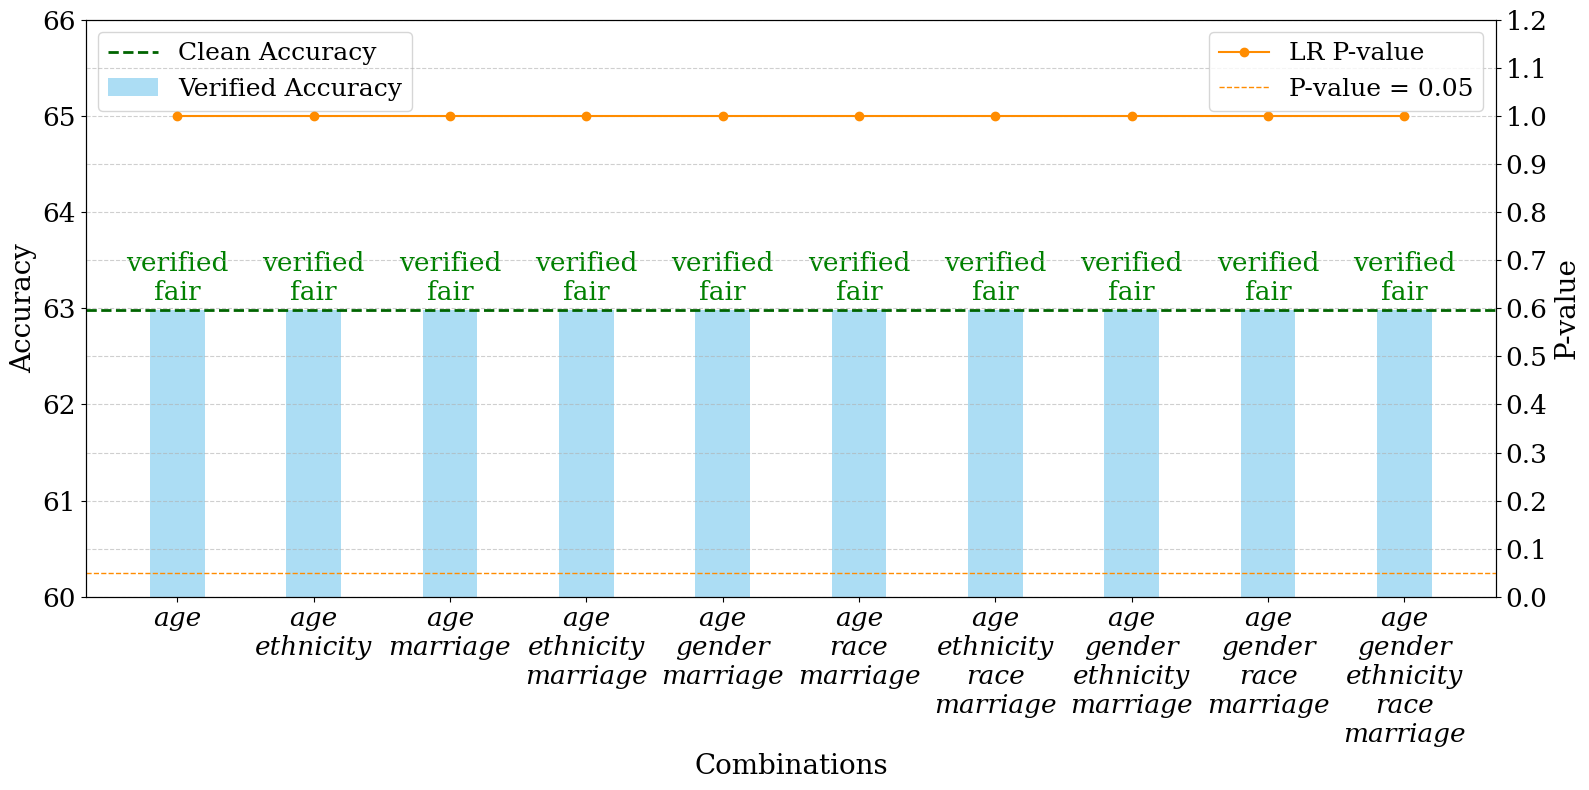

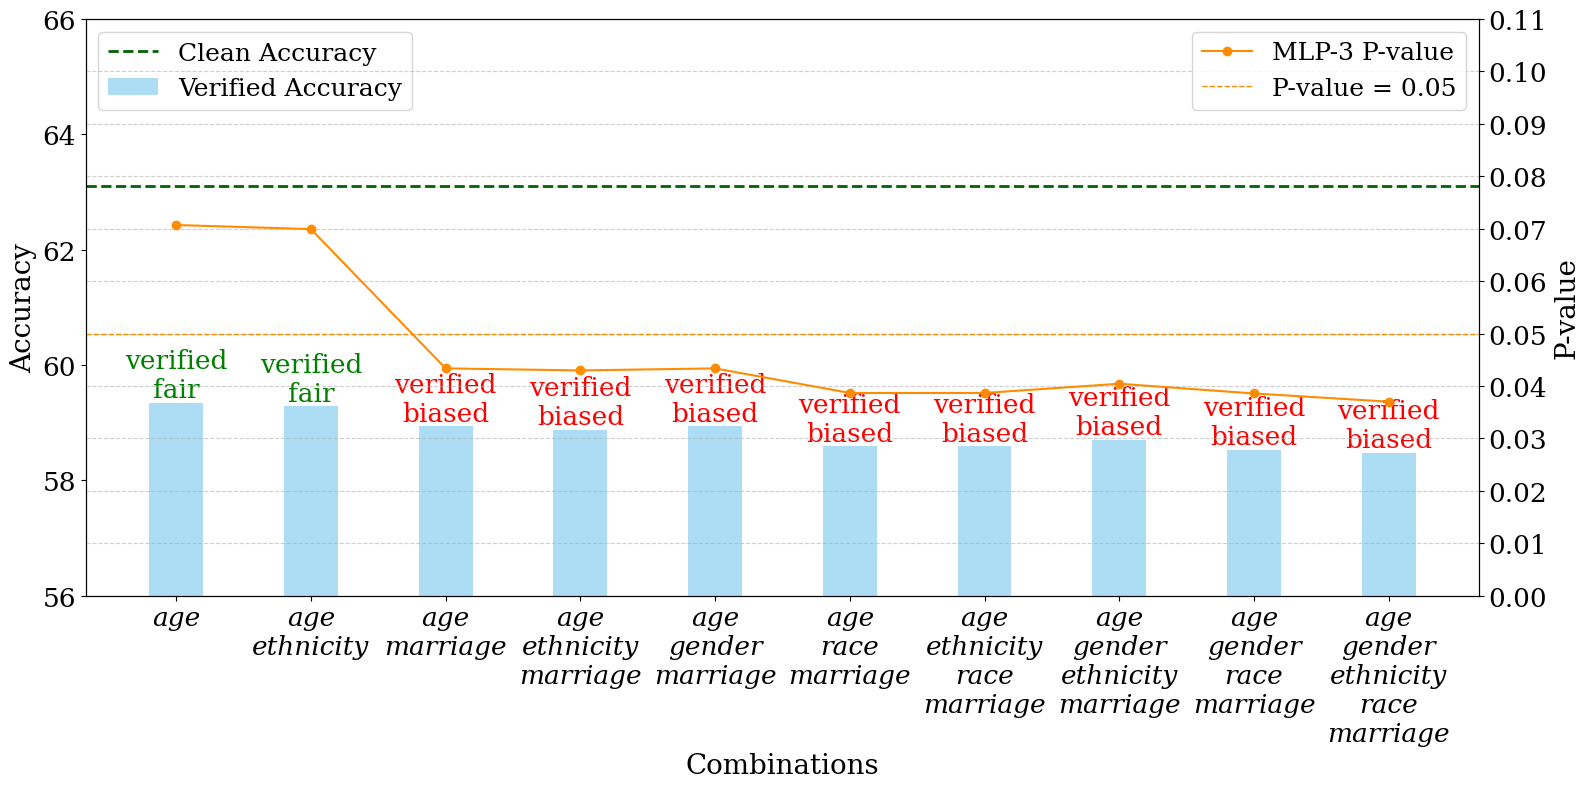

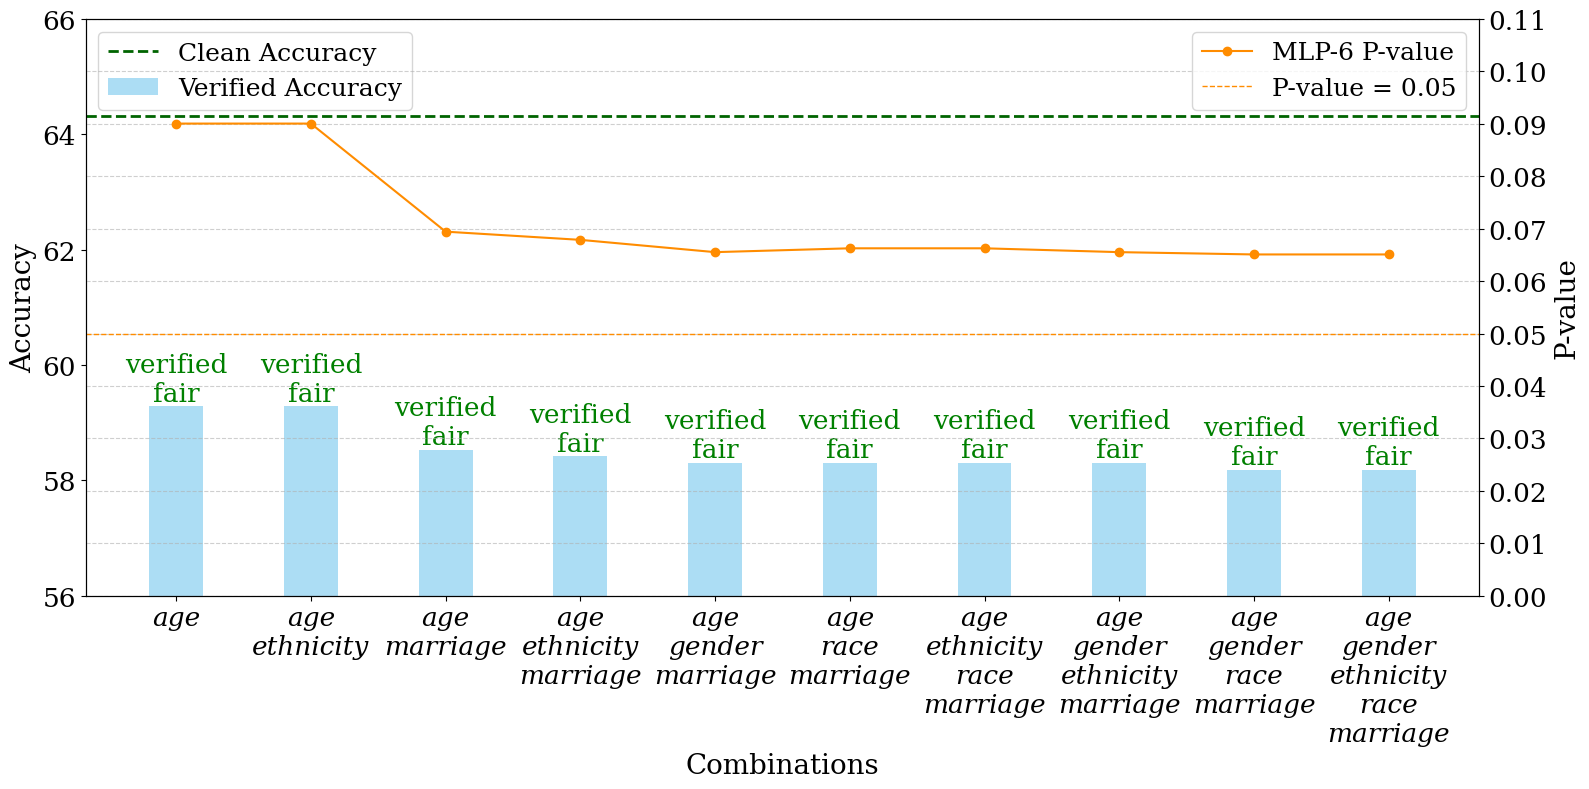

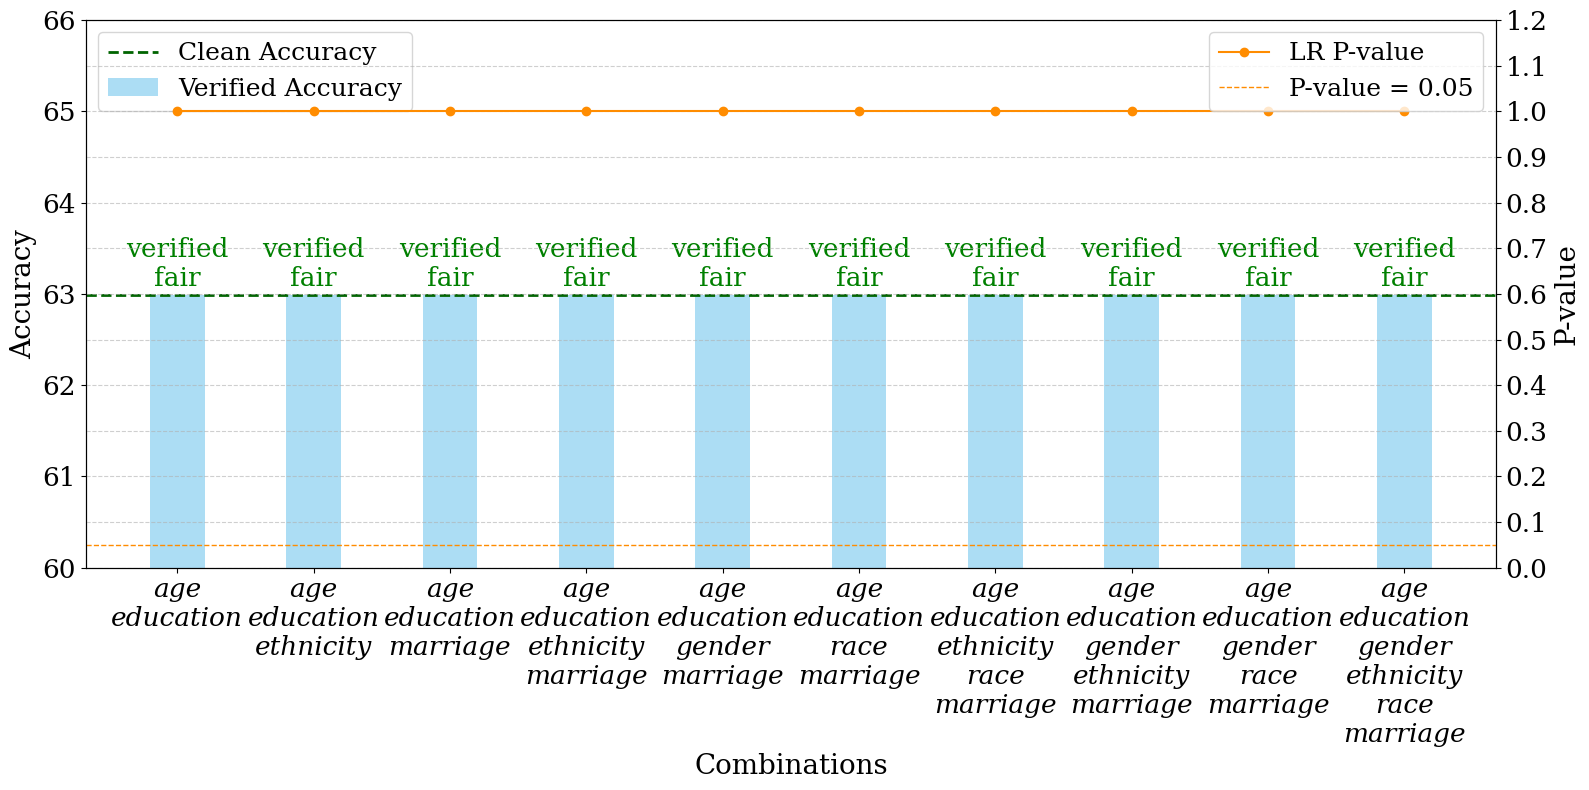

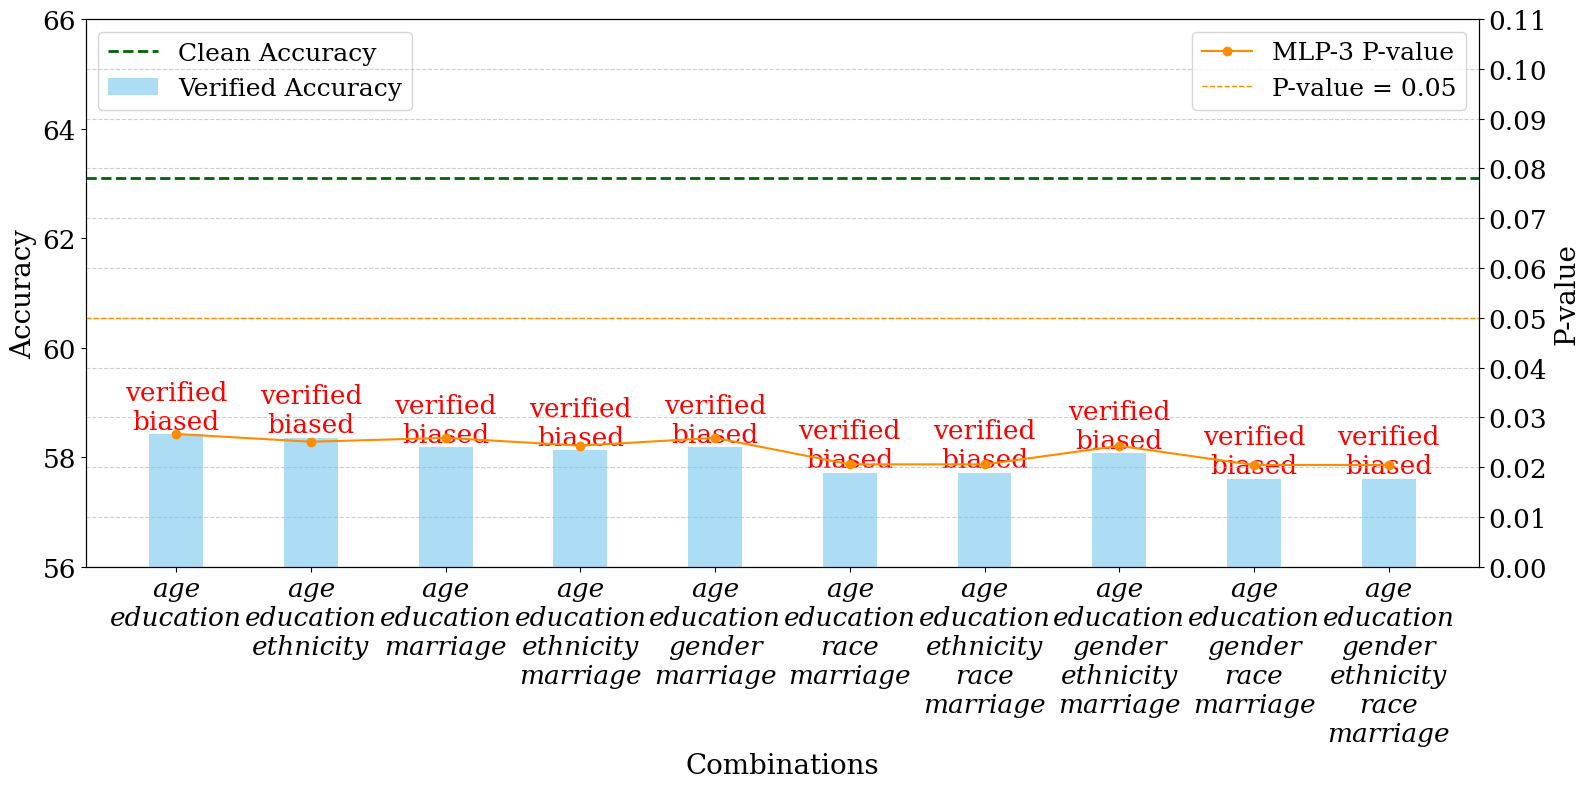

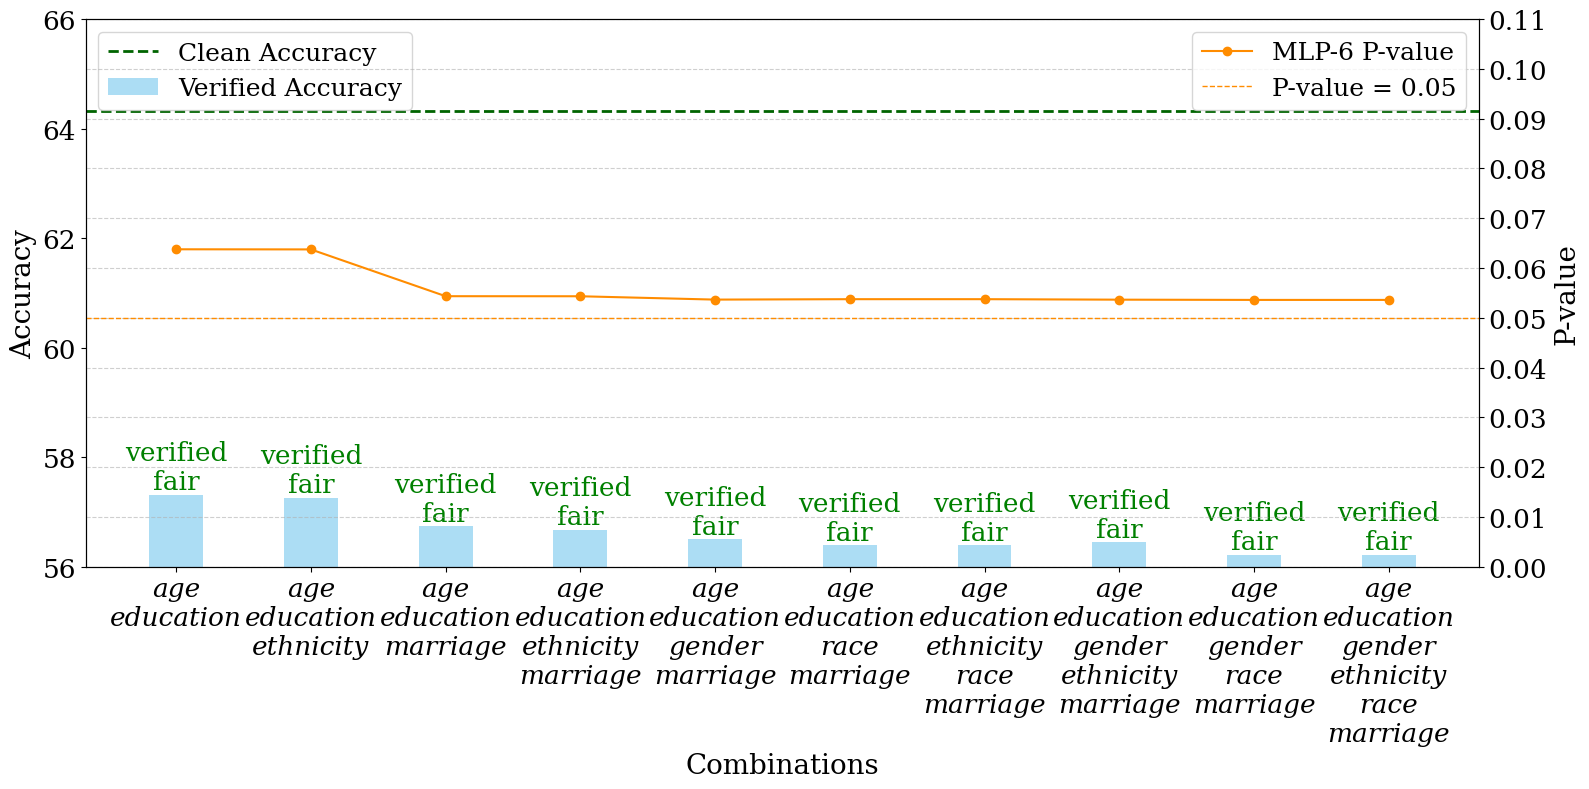

age_related_data
LR results:
LR AGE p-value: 1.0, verified accuracy: 62.9823, clean accuracy: 62.9823, verified status: fair
LR AGE_PTETHCAT p-value: 1.0, verified accuracy: 62.9823, clean accuracy: 62.9823, verified status: fair
LR AGE_PTMARRY p-value: 1.0, verified accuracy: 62.9823, clean accuracy: 62.9823, verified status: fair
LR AGE_PTETHCAT_PTMARRY p-value: 1.0, verified accuracy: 62.9823, clean accuracy: 62.9823, verified status: fair
LR AGE_PTGENDER_PTMARRY p-value: 1.0, verified accuracy: 62.9823, clean accuracy: 62.9823, verified status: fair
LR AGE_PTRACCAT_PTMARRY p-value: 1.0, verified accuracy: 62.9823, clean accuracy: 62.9823, verified status: fair
LR AGE_PTETHCAT_PTRACCAT_PTMARRY p-value: 1.0, verified accuracy: 62.9823, clean accuracy: 62.9823, verified status: fair
LR AGE_PTGENDER_PTETHCAT_PTMARRY p-value: 1.0, verified accuracy: 62.9823, clean accuracy: 62.9823, verified status: fair
LR AGE_PTGENDER_PTRACCAT_PTMARRY p-value: 1.0, verified accuracy: 62.9823, clean ac

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import os

def get_values(data_dir, model, combinations, value):
    with open(data_dir, 'r') as f:
        lines_all = f.readlines()
        if model == "logistic":
            lines = [line for line in lines_all if " model logistic " in line]
        elif model == "mlp3":
            lines = [line for line in lines_all if " model mlp3 " in line]
        elif model == "mlp6":
            lines = [line for line in lines_all if " model mlp6 " in line]
    comb_lines = []
    for combination in combinations:
        line = [line for line in lines if f" combination {combination} " in line]
        assert len(line) == 1, f"Expected 1 line, but got {len(line)} lines for combination {combination}"
        comb_lines.append(line[0])
    
    comb_lines_with_value = [line for line in comb_lines if f"{value}=" in line]
    comb_lines_to_values = [line.split(f"{value}=")[1].split(",")[0].replace("%","") for line in comb_lines_with_value]
    return [float(value) for value in comb_lines_to_values]

# Define combinations for age_and_education
data_dir = "log_07042024/analysis_-1.txt"

combinations_age = [
    "AGE",
    "AGE_PTETHCAT",
    # ['age_ethnicity_marriage', 'age_ethnicity_race_marriage', 'age_gender_ethnicity_marriage', 'age_gender_ethnicity_race_marriage', 'age_gender_marriage', 'age_gender_race_marriage', 'age_marriage', 'age_race_marriage']
    "AGE_PTETHCAT_PTMARRY",
    "AGE_PTETHCAT_PTRACCAT_PTMARRY",
    "AGE_PTGENDER_PTETHCAT_PTMARRY",
    "AGE_PTGENDER_PTETHCAT_PTRACCAT_PTMARRY",
    "AGE_PTGENDER_PTMARRY",
    "AGE_PTGENDER_PTRACCAT_PTMARRY",
    "AGE_PTMARRY",
    "AGE_PTRACCAT_PTMARRY",
]

combinations_education = [
# ['age_education', 'age_education_ethnicity', 'age_education_ethnicity_marriage', 'age_education_ethnicity_race', 'age_education_ethnicity_race_marriage', 'age_education_marriage', 'age_education_race', 'age_education_race_marriage', 'age_gender_education', 'age_gender_education_ethnicity', 'age_gender_education_ethnicity_marriage', 'age_gender_education_ethnicity_race', 'age_gender_education_ethnicity_race_marriage', 'age_gender_education_marriage', 'age_gender_education_race', 'age_gender_education_race_marriage']
    # "PTEDUCAT",
    "AGE_PTEDUCAT",
    "AGE_PTEDUCAT_PTETHCAT",
    "AGE_PTEDUCAT_PTETHCAT_PTMARRY",
    "AGE_PTEDUCAT_PTETHCAT_PTRACCAT",
    "AGE_PTEDUCAT_PTETHCAT_PTRACCAT_PTMARRY",
    "AGE_PTEDUCAT_PTMARRY",
    "AGE_PTEDUCAT_PTRACCAT",
    "AGE_PTEDUCAT_PTRACCAT_PTMARRY",
    "AGE_PTGENDER_PTEDUCAT",
    "AGE_PTGENDER_PTEDUCAT_PTETHCAT",
    # "AGE_PTGENDER_PTEDUCAT_PTETHCAT_PTMARRY",
    # "AGE_PTGENDER_PTEDUCAT_PTETHCAT_PTRACCAT",
    # "AGE_PTGENDER_PTEDUCAT_PTETHCAT_PTRACCAT_PTMARRY",
    # "AGE_PTGENDER_PTEDUCAT_PTMARRY",
    # "AGE_PTGENDER_PTEDUCAT_PTRACCAT",
    # "AGE_PTGENDER_PTEDUCAT_PTRACCAT_PTMARRY",
]
combinations_age = [
    'AGE',
    'AGE_PTETHCAT',
    'AGE_PTMARRY',
    'AGE_PTETHCAT_PTMARRY',
    'AGE_PTGENDER_PTMARRY',
    'AGE_PTRACCAT_PTMARRY',
    'AGE_PTETHCAT_PTRACCAT_PTMARRY',
    'AGE_PTGENDER_PTETHCAT_PTMARRY',
    'AGE_PTGENDER_PTRACCAT_PTMARRY',
    'AGE_PTGENDER_PTETHCAT_PTRACCAT_PTMARRY'
]
combinations_education = [
    "AGE_PTEDUCAT",# "AGE",
    "AGE_PTEDUCAT_PTETHCAT",# "AGE_PTETHCAT",
    "AGE_PTEDUCAT_PTMARRY", # "AGE_PTMARRY",
    "AGE_PTEDUCAT_PTETHCAT_PTMARRY", # "AGE_PTETHCAT_PTMARRY",
    "AGE_PTGENDER_PTEDUCAT_PTMARRY", # "AGE_PTGENDER_PTMARRY",
    "AGE_PTEDUCAT_PTRACCAT_PTMARRY", # "AGE_PTRACCAT_PTMARRY",
    "AGE_PTEDUCAT_PTETHCAT_PTRACCAT_PTMARRY", # "AGE_PTETHCAT_PTRACCAT_PTMARRY",
    "AGE_PTGENDER_PTEDUCAT_PTETHCAT_PTMARRY", # "AGE_PTGENDER_PTETHCAT_PTMARRY",
    "AGE_PTGENDER_PTEDUCAT_PTRACCAT_PTMARRY", # "AGE_PTGENDER_PTRACCAT_PTMARRY",
    "AGE_PTGENDER_PTEDUCAT_PTETHCAT_PTRACCAT_PTMARRY", # "AGE_PTGENDER_PTETHCAT_PTRACCAT_PTMARRY",
]
# Define p-values and accuracy data for the models
logistic_p_values_age = get_values(data_dir, "logistic", combinations_age, "p-value")
logistic_p_values_education = get_values(data_dir, "logistic", combinations_education, "p-value")
mlp3_p_values_age = get_values(data_dir, "mlp3", combinations_age, "p-value")
mlp6_p_values_age = get_values(data_dir, "mlp6", combinations_age, "p-value")
mlp3_p_values_education = get_values(data_dir, "mlp3", combinations_education, "p-value")
mlp6_p_values_education = get_values(data_dir, "mlp6", combinations_education, "p-value")

logistic_clean_accuracy_age = get_values(data_dir, "logistic", combinations_age, "clean_accuracy")
logistic_clean_accuracy_education = get_values(data_dir, "logistic", combinations_education, "clean_accuracy")

mlp3_clean_accuracy = get_values(data_dir, "mlp3", combinations_age, "clean_accuracy")
mlp6_clean_accuracy = get_values(data_dir, "mlp6", combinations_age, "clean_accuracy")

logistic_verified_accuracy_age = get_values(data_dir, "logistic", combinations_age, "verified_accuracy")
logistic_verified_accuracy_education = get_values(data_dir, "logistic", combinations_education, "verified_accuracy")

mlp3_verified_accuracy_age = get_values(data_dir, "mlp3", combinations_age, "verified_accuracy")
mlp6_verified_accuracy_age = get_values(data_dir, "mlp6", combinations_age, "verified_accuracy")
mlp3_verified_accuracy_education = get_values(data_dir, "mlp3", combinations_education, "verified_accuracy")
mlp6_verified_accuracy_education = get_values(data_dir, "mlp6", combinations_education, "verified_accuracy")

translations = {
    "AGE": "age",
    "PTGENDER": "gender",
    "PTEDUCAT": "education",
    "PTETHCAT": "ethnicity",
    "PTRACCAT": "race",
    "PTMARRY": "marriage",  
}

# Convert combinations to human-readable format
def translate_combination(combination):
    ans = [translations[attr] for attr in combination.split("_")]
    if "education" not in ans and "age" in ans:
        # make sure age is always the first attribute in the list of attributes
        ans.remove("age")
        ans.insert(0, "age")
    elif "age" in ans and "education" in ans:
        # make sure "age" and "education" are always the first two attributes in the list of attributes
        ans.remove("age")
        ans.remove("education")
        ans.insert(0, "age")
        ans.insert(1, "education")
    return "\n".join(ans)
        
        

# Font size variables
title_font_size = 20
label_font_size = 20
legend_font_size = 18
tick_font_size = 19

def plot_combination_data_separate_models(combinations, p_values, clean_accuracy, verified_accuracy, model_name, title_suffix):
    translated_combinations = [translate_combination(combo) for combo in combinations]
    x = np.arange(len(translated_combinations))
    width = 0.4
    fig, ax1 = plt.subplots(figsize=(16, 8))

    # Plotting verified accuracy as a bar chart with opacity
    ax1.bar(x, verified_accuracy[:len(x)], width, label='Verified Accuracy', alpha=0.7, color='#89CFF0')

    ax1.set_xlabel('Combinations', fontsize=label_font_size, fontname='serif')
    ax1.set_ylabel('Accuracy', fontsize=label_font_size, fontname='serif')
    if model_name == "LR":
        ax1.set_ylim([60, 66])  # Adjusting range for Logistic
    else:
        ax1.set_ylim([56, 66])  # Adjusting range for MLP3 and MLP6

    ax1.set_xticks(x)

    ax2 = ax1.twinx()
    ax2.plot(x, p_values[:len(x)], marker='o', color='#FF8C00', linestyle='-', label=f'{model_name} P-value')

    ax2.set_ylabel('P-value', fontsize=label_font_size, fontname='serif')
    ax2.axhline(0.05, color='#FF8C00', linestyle='dashed', linewidth=1, label='P-value = 0.05')
    if model_name == "LR":
        ax2.set_ylim([0, 1.1+0.1])  # Adjusting range for Logistic
        ax2.yaxis.set_major_locator(plt.MultipleLocator(0.1))
    else:
        ax2.set_ylim([0, 0.1+0.01])  # Adjusting range for MLP3 and MLP6
        ax2.yaxis.set_major_locator(plt.MultipleLocator(0.01))

    # Adding a single horizontal dashed line for clean accuracy
    clean_accuracy_mean = np.mean(clean_accuracy)
    ax1.axhline(clean_accuracy_mean, color='#006400', linestyle='dashed', linewidth=2, label='Clean Accuracy')

    # Adding legends for both axes
    ax1.legend(loc='upper left', fontsize=legend_font_size, prop={'family': 'serif', 'size': legend_font_size})
    ax2.legend(loc='upper right', fontsize=legend_font_size, prop={'family': 'serif', 'size': legend_font_size})

    max_leng_comb = max([len(combo.split("_")) for combo in combinations])
    
    # Labeling each combination based on P-value with different colors
    for i, p_val in enumerate(p_values[:len(x)]):
        label = 'verified\nbiased' if p_val < 0.05 else 'verified\nfair'
        additional_space_lst = ['\n'] * (max_leng_comb-len(combinations[i].split("_")))
        additional_space = ''.join(additional_space_lst)
        
        color = 'red' if p_val < 0.05 else 'green'
        
        ax1.text(x[i], verified_accuracy[i] + 0.1, label, color=color, ha='center', fontsize=tick_font_size, fontname='serif', fontstyle='normal')

    ax1.set_xticklabels(translated_combinations, rotation=0, ha='center', fontsize=tick_font_size, fontname='serif', fontstyle='italic')
    ax1.tick_params(axis='both', which='major', labelsize=tick_font_size)
    ax1.tick_params(axis='both', which='minor', labelsize=tick_font_size)
    ax2.tick_params(axis='both', which='major', labelsize=tick_font_size)
    ax2.tick_params(axis='both', which='minor', labelsize=tick_font_size)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    
    os.makedirs('plts', exist_ok=True)
    plt.savefig(f'plts/{model_name}_{title_suffix}.pdf', bbox_inches='tight', dpi=300)
    plt.show()

# Sort combinations_education based on the number of attributes
sorted_combinations_education = sorted(combinations_education, key=lambda x: len(x.split("_")))

# Data for plotting
model_data_age = [
    ("LR", logistic_p_values_age, logistic_clean_accuracy_age, logistic_verified_accuracy_age, "age_related_combinations"),
    ("MLP-3", mlp3_p_values_age, mlp3_clean_accuracy, mlp3_verified_accuracy_age, "age_related_combinations"),
    ("MLP-6", mlp6_p_values_age, mlp6_clean_accuracy, mlp6_verified_accuracy_age, "age_related_combinations")
]

model_data_education = [
    ("LR", logistic_p_values_education, logistic_clean_accuracy_education, logistic_verified_accuracy_education, "age_and_education_related_combinations"),
    ("MLP-3", mlp3_p_values_education, mlp3_clean_accuracy, mlp3_verified_accuracy_education, "age_and_education_related_combinations"),
    ("MLP-6", mlp6_p_values_education, mlp6_clean_accuracy, mlp6_verified_accuracy_education, "age_and_education_related_combinations")
]

# Plot each model separately for age_related_combinations
for model_name, p_values, clean_accuracy, verified_accuracy, title_suffix in model_data_age:
    plot_combination_data_separate_models(combinations_age, p_values, clean_accuracy, verified_accuracy, model_name, title_suffix)

# Plot each model separately for sorted age_and_education_related_combinations
for model_name, p_values, clean_accuracy, verified_accuracy, title_suffix in model_data_education:
    plot_combination_data_separate_models(sorted_combinations_education, p_values, clean_accuracy, verified_accuracy, model_name, title_suffix)

# Print out all the age_related_data
print("age_related_data")
print("LR results:")
for p_values, verified_accuracy, clean_accuracy, combination, model_name in zip(logistic_p_values_age, logistic_verified_accuracy_age, logistic_clean_accuracy_age, combinations_age, ["LR"]*len(combinations_age)):
    print(f"{model_name} {combination} p-value: {p_values}, verified accuracy: {verified_accuracy}, clean accuracy: {clean_accuracy}, verified status: {'biased' if p_values < 0.05 else 'fair'}")
print("MLP-3 results:")
for p_values, verified_accuracy, clean_accuracy, combination, model_name in zip(mlp3_p_values_age, mlp3_verified_accuracy_age, mlp3_clean_accuracy, combinations_age, ["MLP-3"]*len(combinations_age)):
    print(f"{model_name} {combination} p-value: {p_values}, verified accuracy: {verified_accuracy}, clean accuracy: {clean_accuracy}, verified status: {'biased' if p_values < 0.05 else 'fair'}")
print("MLP-6 results:")
for p_values, verified_accuracy, clean_accuracy, combination, model_name in zip(mlp6_p_values_age, mlp6_verified_accuracy_age, mlp6_clean_accuracy, combinations_age, ["MLP-6"]*len(combinations_age)):
    print(f"{model_name} {combination} p-value: {p_values}, verified accuracy: {verified_accuracy}, clean accuracy: {clean_accuracy}, verified status: {'biased' if p_values < 0.05 else 'fair'}")

# Print out all the age_and_education_related_data
print("age_and_education_related_data")
print("LR results:")
for p_values, verified_accuracy, clean_accuracy, combination, model_name in zip(logistic_p_values_education, logistic_verified_accuracy_education, logistic_clean_accuracy_education, combinations_education, ["LR"]*len(combinations_education)):
    print(f"{model_name} {combination} p-value: {p_values}, verified accuracy: {verified_accuracy}, clean accuracy: {clean_accuracy}, verified status: {'biased' if p_values < 0.05 else 'fair'}")
print("MLP-3 results:")
for p_values, verified_accuracy, clean_accuracy, combination, model_name in zip(mlp3_p_values_education, mlp3_verified_accuracy_education, mlp3_clean_accuracy, combinations_education, ["MLP-3"]*len(combinations_education)):
    print(f"{model_name} {combination} p-value: {p_values}, verified accuracy: {verified_accuracy}, clean accuracy: {clean_accuracy}, verified status: {'biased' if p_values < 0.05 else 'fair'}")
print("MLP-6 results:")
for p_values, verified_accuracy, clean_accuracy, combination, model_name in zip(mlp6_p_values_education, mlp6_verified_accuracy_education, mlp6_clean_accuracy, combinations_education, ["MLP-6"]*len(combinations_education)):
    print(f"{model_name} {combination} p-value: {p_values}, verified accuracy: {verified_accuracy}, clean accuracy: {clean_accuracy}, verified status: {'biased' if p_values < 0.05 else 'fair'}")


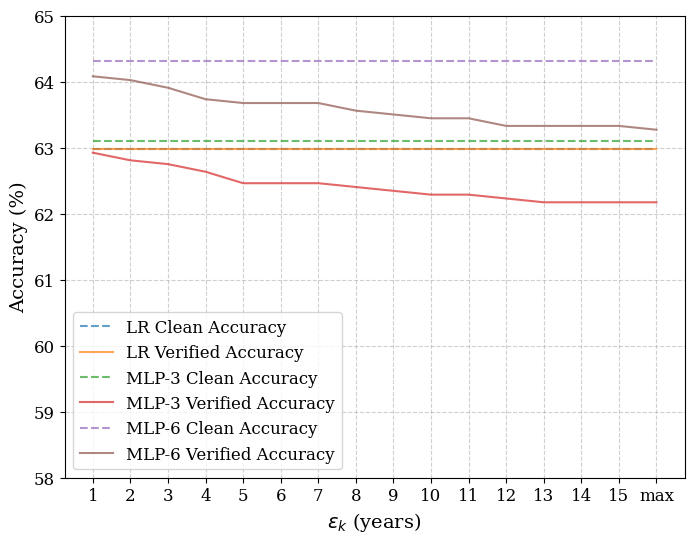

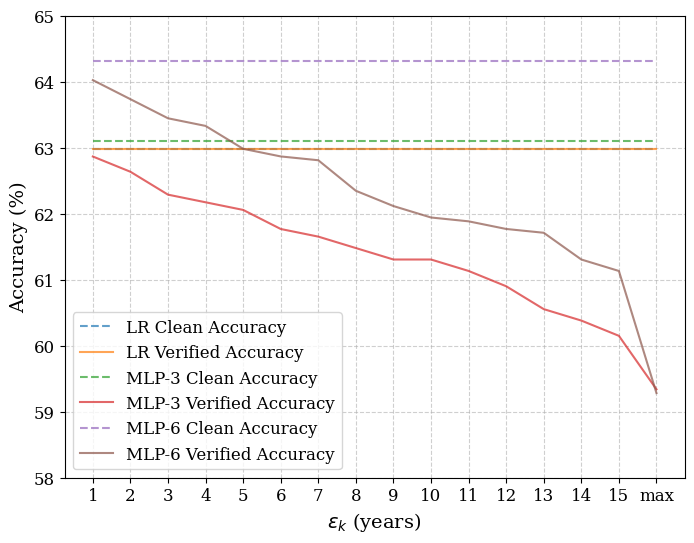

Verified accuracies for age analysis
LR results:
LR epsilon=1 clean accuracy: 62.9823, verified accuracy: 62.9823, verified status: fair
LR epsilon=2 clean accuracy: 62.9823, verified accuracy: 62.9823, verified status: fair
LR epsilon=3 clean accuracy: 62.9823, verified accuracy: 62.9823, verified status: fair
LR epsilon=4 clean accuracy: 62.9823, verified accuracy: 62.9823, verified status: fair
LR epsilon=5 clean accuracy: 62.9823, verified accuracy: 62.9823, verified status: fair
LR epsilon=6 clean accuracy: 62.9823, verified accuracy: 62.9823, verified status: fair
LR epsilon=7 clean accuracy: 62.9823, verified accuracy: 62.9823, verified status: fair
LR epsilon=8 clean accuracy: 62.9823, verified accuracy: 62.9823, verified status: fair
LR epsilon=9 clean accuracy: 62.9823, verified accuracy: 62.9823, verified status: fair
LR epsilon=10 clean accuracy: 62.9823, verified accuracy: 62.9823, verified status: fair
LR epsilon=11 clean accuracy: 62.9823, verified accuracy: 62.9823, ver

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import os
def get_values(data_dir, model, combinations, value):
    with open(data_dir, 'r') as f:
        lines_all = f.readlines()
        if model == "logistic":
            lines = [line for line in lines_all if " model logistic " in line]
        elif model == "mlp3":
            lines = [line for line in lines_all if " model mlp3 " in line]
        elif model == "mlp6":
            lines = [line for line in lines_all if " model mlp6 " in line]
    comb_lines = []
    for combination in combinations:
        lines_extracted = [line for line in lines if f" combination {combination} " in line]
        comb_lines.extend(lines_extracted)

    comb_lines_with_value = [line for line in comb_lines if f"{value}=" in line]
    comb_lines_to_values = [line.split(f"{value}=")[1].split(",")[0].replace("%","") for line in comb_lines_with_value]
    return [float(value) for value in comb_lines_to_values]
data_dir_age = "log_07042024/analysis_age.txt"
data_dir_education = "log_07042024/analysis_education.txt"
year_eps_education = [str(tmp) for tmp in np.arange(1, 17, dtype=int)]
year_eps_education[-1] = 'max'

# Data for education analysis
clean_accuracy_education_logistic = get_values(data_dir_education, "logistic", ["PTEDUCAT"], "clean_accuracy")
verified_accuracy_education_logistic = get_values(data_dir_education, "logistic", ["PTEDUCAT"], "verified_accuracy")

clean_accuracy_education_mlp3 = get_values(data_dir_education, "mlp3", ["PTEDUCAT"], "clean_accuracy")
verified_accuracy_education_mlp3 = get_values(data_dir_education, "mlp3", ["PTEDUCAT"], "verified_accuracy")

clean_accuracy_education_mlp6 = get_values(data_dir_education, "mlp6", ["PTEDUCAT"], "clean_accuracy")
verified_accuracy_education_mlp6 = get_values(data_dir_education, "mlp6", ["PTEDUCAT"], "verified_accuracy")

# Data for age analysis
clean_accuracy_age_logistic = get_values(data_dir_age, "logistic", ["AGE"], "clean_accuracy")
verified_accuracy_age_logistic = get_values(data_dir_age, "logistic", ["AGE"], "verified_accuracy")

clean_accuracy_age_mlp3 = get_values(data_dir_age, "mlp3", ["AGE"], "clean_accuracy")
verified_accuracy_age_mlp3 = get_values(data_dir_age, "mlp3", ["AGE"], "verified_accuracy")

clean_accuracy_age_mlp6 = get_values(data_dir_age, "mlp6", ["AGE"], "clean_accuracy")
verified_accuracy_age_mlp6 = get_values(data_dir_age, "mlp6", ["AGE"], "verified_accuracy")

# Set font style to serif
plt.rcParams['font.family'] = 'serif'

# Plotting the education analysis
plt.figure(figsize=(8, 6))
plt.plot(year_eps_education, clean_accuracy_education_logistic, linestyle='--', alpha=0.7, label='LR Clean Accuracy')
plt.plot(year_eps_education, verified_accuracy_education_logistic, linestyle='-', alpha=0.7, label='LR Verified Accuracy')
plt.plot(year_eps_education, clean_accuracy_education_mlp3, linestyle='--', alpha=0.7, label='MLP-3 Clean Accuracy')
plt.plot(year_eps_education, verified_accuracy_education_mlp3, linestyle='-', alpha=0.7, label='MLP-3 Verified Accuracy')
plt.plot(year_eps_education, clean_accuracy_education_mlp6, linestyle='--', alpha=0.7, label='MLP-6 Clean Accuracy')
plt.plot(year_eps_education, verified_accuracy_education_mlp6, linestyle='-', alpha=0.7, label='MLP-6 Verified Accuracy')
plt.xticks(ticks=range(16), labels=year_eps_education, fontsize=12)
plt.yticks(ticks=range(58, 66), fontsize=12)
plt.xlabel(r'$\epsilon_k$ (years)', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
# plt.title('Verified Accuracies Analysis on Education', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
os.makedirs('plts', exist_ok=True)
plt.savefig('plts/education_verified_accuracy.pdf', bbox_inches='tight', dpi=300)
plt.show()

# Plotting the age analysis
plt.figure(figsize=(8, 6))
plt.plot(year_eps_education, clean_accuracy_age_logistic, linestyle='--', alpha=0.7, label='LR Clean Accuracy')
plt.plot(year_eps_education, verified_accuracy_age_logistic, linestyle='-', alpha=0.7, label='LR Verified Accuracy')
plt.plot(year_eps_education, clean_accuracy_age_mlp3, linestyle='--', alpha=0.7, label='MLP-3 Clean Accuracy')
plt.plot(year_eps_education, verified_accuracy_age_mlp3, linestyle='-', alpha=0.7, label='MLP-3 Verified Accuracy')
plt.plot(year_eps_education, clean_accuracy_age_mlp6, linestyle='--', alpha=0.7, label='MLP-6 Clean Accuracy')
plt.plot(year_eps_education, verified_accuracy_age_mlp6, linestyle='-', alpha=0.7, label='MLP-6 Verified Accuracy')
plt.xticks(ticks=range(16), labels=year_eps_education, fontsize=12)
plt.yticks(ticks=range(58, 66), fontsize=12)
plt.xlabel(r'$\epsilon_k$ (years)', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
# plt.title('Verified Accuracies Analysis on Age', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
os.makedirs('plts', exist_ok=True)
plt.savefig('plts/age_verified_accuracy.pdf', bbox_inches='tight', dpi=300)
plt.show()
print("Verified accuracies for age analysis")
print("LR results:")
for clean_accuracy, verified_accuracy, year_eps, model_name in zip(clean_accuracy_age_logistic, verified_accuracy_age_logistic, year_eps_education, ["LR"]*len(year_eps_education)):
    print(f"{model_name} epsilon={year_eps} clean accuracy: {clean_accuracy}, verified accuracy: {verified_accuracy}, verified status: {'biased' if verified_accuracy < clean_accuracy else 'fair'}")
print("MLP-3 results:")
for clean_accuracy, verified_accuracy, year_eps, model_name in zip(clean_accuracy_age_mlp3, verified_accuracy_age_mlp3, year_eps_education, ["MLP-3"]*len(year_eps_education)):
    print(f"{model_name} epsilon={year_eps} clean accuracy: {clean_accuracy}, verified accuracy: {verified_accuracy}, verified status: {'biased' if verified_accuracy < clean_accuracy else 'fair'}")
print("MLP-6 results:")
for clean_accuracy, verified_accuracy, year_eps, model_name in zip(clean_accuracy_age_mlp6, verified_accuracy_age_mlp6, year_eps_education, ["MLP-6"]*len(year_eps_education)):
    print(f"{model_name} epsilon={year_eps} clean accuracy: {clean_accuracy}, verified accuracy: {verified_accuracy}, verified status: {'biased' if verified_accuracy < clean_accuracy else 'fair'}")
print("Verified accuracies for education analysis")
print("LR results:")
for clean_accuracy, verified_accuracy, year_eps, model_name in zip(clean_accuracy_education_logistic, verified_accuracy_education_logistic, year_eps_education, ["LR"]*len(year_eps_education)):
    print(f"{model_name} epsilon={year_eps} clean accuracy: {clean_accuracy}, verified accuracy: {verified_accuracy}, verified status: {'biased' if verified_accuracy < clean_accuracy else 'fair'}")
print("MLP-3 results:")
for clean_accuracy, verified_accuracy, year_eps, model_name in zip(clean_accuracy_education_mlp3, verified_accuracy_education_mlp3, year_eps_education, ["MLP-3"]*len(year_eps_education)):
    print(f"{model_name} epsilon={year_eps} clean accuracy: {clean_accuracy}, verified accuracy: {verified_accuracy}, verified status: {'biased' if verified_accuracy < clean_accuracy else 'fair'}")
print("MLP-6 results:")
for clean_accuracy, verified_accuracy, year_eps, model_name in zip(clean_accuracy_education_mlp6, verified_accuracy_education_mlp6, year_eps_education, ["MLP-6"]*len(year_eps_education)):
    print(f"{model_name} epsilon={year_eps} clean accuracy: {clean_accuracy}, verified accuracy: {verified_accuracy}, verified status: {'biased' if verified_accuracy < clean_accuracy else 'fair'}")
    
    
    

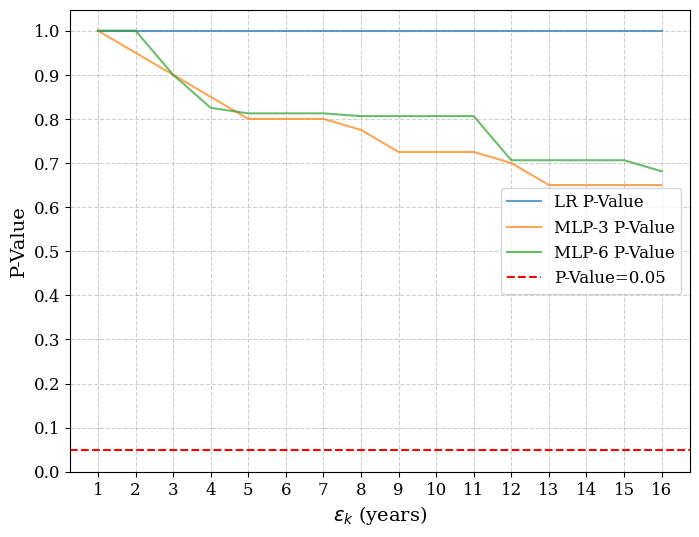

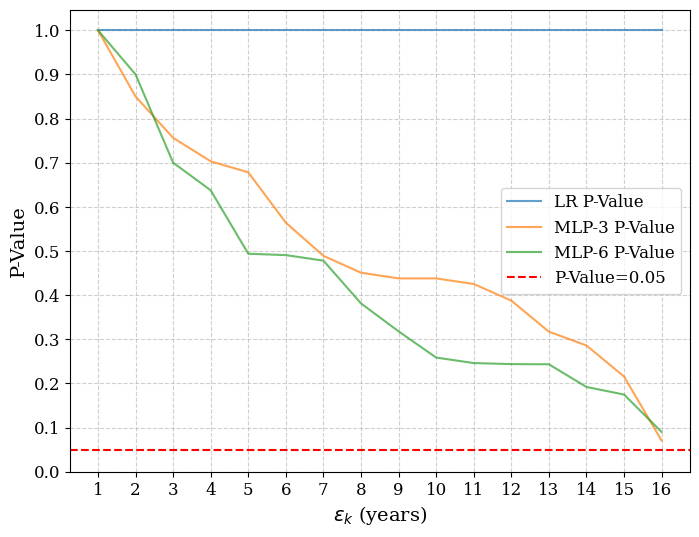

age_attribute_p-values
LR results:
LR epsilon=1 p-value: 1.0, verified status: fair
LR epsilon=2 p-value: 1.0, verified status: fair
LR epsilon=3 p-value: 1.0, verified status: fair
LR epsilon=4 p-value: 1.0, verified status: fair
LR epsilon=5 p-value: 1.0, verified status: fair
LR epsilon=6 p-value: 1.0, verified status: fair
LR epsilon=7 p-value: 1.0, verified status: fair
LR epsilon=8 p-value: 1.0, verified status: fair
LR epsilon=9 p-value: 1.0, verified status: fair
LR epsilon=10 p-value: 1.0, verified status: fair
LR epsilon=11 p-value: 1.0, verified status: fair
LR epsilon=12 p-value: 1.0, verified status: fair
LR epsilon=13 p-value: 1.0, verified status: fair
LR epsilon=14 p-value: 1.0, verified status: fair
LR epsilon=15 p-value: 1.0, verified status: fair
LR epsilon=16 p-value: 1.0, verified status: fair
MLP-3 results:
MLP-3 epsilon=1 p-value: 1.0, verified status: fair
MLP-3 epsilon=2 p-value: 0.85, verified status: fair
MLP-3 epsilon=3 p-value: 0.75625, verified status: fai

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import os
def get_values(data_dir, model, combinations, value):
    with open(data_dir, 'r') as f:
        lines_all = f.readlines()
        if model == "logistic":
            lines = [line for line in lines_all if " model logistic " in line]
        elif model == "mlp3":
            lines = [line for line in lines_all if " model mlp3 " in line]
        elif model == "mlp6":
            lines = [line for line in lines_all if " model mlp6 " in line]
    comb_lines = []
    for combination in combinations:
        lines_extracted = [line for line in lines if f" combination {combination} " in line]
        comb_lines.extend(lines_extracted)

    comb_lines_with_value = [line for line in comb_lines if f"{value}=" in line]
    comb_lines_to_values = [line.split(f"{value}=")[1].split(",")[0].replace("%","") for line in comb_lines_with_value]
    return [float(value) for value in comb_lines_to_values]
data_dir_age = "log_07042024/analysis_age.txt"
data_dir_education = "log_07042024/analysis_education.txt"
# Data for p-value analysis
year_eps_education = [str(tmp) for tmp in np.arange(1, 17, dtype=int)]
# change all the number into r'$number$' format
# year_eps_education = [r'$'+str(tmp)+r'$' for tmp in np.arange(1, 17, dtype=int)]
# year_eps_education[-1] = r'$\max$'

p_values_education_logistic = get_values(data_dir_education, "logistic", ["PTEDUCAT"], "p-value")
p_values_education_mlp3 = get_values(data_dir_education, "mlp3", ["PTEDUCAT"], "p-value")
p_values_education_mlp6 = get_values(data_dir_education, "mlp6", ["PTEDUCAT"], "p-value")
p_values_age_logistic = get_values(data_dir_age, "logistic", ["AGE"], "p-value")
p_values_age_mlp3 = get_values(data_dir_age, "mlp3", ["AGE"], "p-value")
p_values_age_mlp6 = get_values(data_dir_age, "mlp6", ["AGE"], "p-value")

# Set font style to serif
plt.rcParams['font.family'] = 'serif'

# Plotting the p-value analysis for education
plt.figure(figsize=(8, 6))
plt.plot(year_eps_education, p_values_education_logistic, linestyle='-', alpha=0.7, label='LR P-Value')
plt.plot(year_eps_education, p_values_education_mlp3, linestyle='-', alpha=0.7, label='MLP-3 P-Value')
plt.plot(year_eps_education, p_values_education_mlp6, linestyle='-', alpha=0.7, label='MLP-6 P-Value')
plt.axhline(y=0.05, color='r', linestyle='--', label='P-Value=0.05')
plt.xticks(ticks=range(16), labels=year_eps_education, fontsize=12)
plt.yticks(ticks=np.arange(0.0, 1.1, 0.1), fontsize=12)
plt.xlabel(r'$\epsilon_k$ (years)', fontsize=14)
plt.ylabel('P-Value', fontsize=14)
# plt.title('P-Values Analysis on Education', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
os.makedirs('plts', exist_ok=True)
plt.savefig('plts/education_p_value.pdf', bbox_inches='tight', dpi=300)
plt.show()

# Plotting the p-value analysis for age
plt.figure(figsize=(8, 6))
plt.plot(year_eps_education, p_values_age_logistic, linestyle='-', alpha=0.7, label='LR P-Value')
plt.plot(year_eps_education, p_values_age_mlp3, linestyle='-', alpha=0.7, label='MLP-3 P-Value')
plt.plot(year_eps_education, p_values_age_mlp6, linestyle='-', alpha=0.7, label='MLP-6 P-Value')
plt.axhline(y=0.05, color='r', linestyle='--', label='P-Value=0.05')
plt.xticks(ticks=range(16), labels=year_eps_education, fontsize=12)
plt.yticks(ticks=np.arange(0.0, 1.1, 0.1), fontsize=12)
plt.xlabel(r'$\epsilon_k$ (years)', fontsize=14)
plt.ylabel('P-Value', fontsize=14)
# plt.title('P-Values Analysis on Age', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
os.makedirs('plts', exist_ok=True)
plt.savefig('plts/age_p_value.pdf', bbox_inches='tight', dpi=300)
plt.show()
# print out all the age_related_p-values, with different epilon values
print("age_attribute_p-values")
print("LR results:")
for p_values, year_eps, model_name in zip(p_values_age_logistic, year_eps_education, ["LR"]*len(year_eps_education)):
    print(f"{model_name} epsilon={year_eps} p-value: {p_values}, verified status: {'biased' if p_values < 0.05 else 'fair'}")
print("MLP-3 results:")
for p_values, year_eps, model_name in zip(p_values_age_mlp3, year_eps_education, ["MLP-3"]*len(year_eps_education)):
    print(f"{model_name} epsilon={year_eps} p-value: {p_values}, verified status: {'biased' if p_values < 0.05 else 'fair'}")
print("MLP-6 results:")
for p_values, year_eps, model_name in zip(p_values_age_mlp6, year_eps_education, ["MLP-6"]*len(year_eps_education)):
    print(f"{model_name} epsilon={year_eps} p-value: {p_values}, verified status: {'biased' if p_values < 0.05 else 'fair'}")
    
# print out all the education_related_p-values, with different epilon values
print("education_attribute_p-values")
print("LR results:")
for p_values, year_eps, model_name in zip(p_values_education_logistic, year_eps_education, ["LR"]*len(year_eps_education)):
    print(f"{model_name} epsilon={year_eps} p-value: {p_values}, verified status: {'biased' if p_values < 0.05 else 'fair'}")
print("MLP-3 results:")
for p_values, year_eps, model_name in zip(p_values_education_mlp3, year_eps_education, ["MLP-3"]*len(year_eps_education)):
    print(f"{model_name} epsilon={year_eps} p-value: {p_values}, verified status: {'biased' if p_values < 0.05 else 'fair'}")
print("MLP-6 results:")
for p_values, year_eps, model_name in zip(p_values_education_mlp6, year_eps_education, ["MLP-6"]*len(year_eps_education)):
    print(f"{model_name} epsilon={year_eps} p-value: {p_values}, verified status: {'biased' if p_values < 0.05 else 'fair'}")


In [14]:
# This block generates data for the table in the paper.
# count the number of p-value < 0.05 and print out the lines with p-value < 0.05
translations = {
    "AGE": "age",
    "PTGENDER": "gender",
    "PTEDUCAT": "education",
    "PTETHCAT": "ethnicity",
    "PTRACCAT": "race",
    "PTMARRY": "marriage",  
}
def translate_line(line):
    for key in translations.keys():
        if key in line:
            line = line.replace(key, translations[key])
    return line
def translate_combination(combination):
    ans = [attr for attr in combination.split("_")]
    if "education" not in ans and "age" in ans:
        # make sure age is always the first attribute in the list of attributes
        ans.remove("age")
        ans.insert(0, "age")
    elif "age" in ans and "education" in ans:
        # make sure "age" and "education" are always the first two attributes in the list of attributes
        ans.remove("age")
        ans.remove("education")
        ans.insert(0, "age")
        ans.insert(1, "education")
    return ", ".join(ans)
for eps in list(range(1, 16))+[-1,]:
    combs = set()
    with open(f'log_07042024/analysis_{eps}.txt', 'r') as f:
        lines = f.readlines()
        count = 0
        for line in lines:
            if 'p-value=' in line:
                p_value = float(line.split('p-value=')[1].split(',')[0])
                if p_value < 0.05:
                    count += 1
                    # print(line)
                    # print line with translation
                    print(translate_line(line))
                    combs.add(translate_line(line.split(' combination ')[1].split(' statistic=')[0]))
        print(f'At eps={eps}, we have {count} combinations with p-value < 0.05 as shown above.')
        # print sorted combinations
        print(sorted(combs))
        # print sorted combinations with education
        print("with education")
        print(sorted([translate_combination(comb) for comb in combs if "education" in comb]))
        # print sorted combinations without education
        print("without education")
        print(sorted([translate_combination(comb) for comb in combs if "education" not in comb]))
        print(f'---------------------------')

At eps=1, we have 0 combinations with p-value < 0.05 as shown above.
[]
with education
[]
without education
[]
---------------------------
At eps=2, we have 0 combinations with p-value < 0.05 as shown above.
[]
with education
[]
without education
[]
---------------------------
At eps=3, we have 0 combinations with p-value < 0.05 as shown above.
[]
with education
[]
without education
[]
---------------------------
At eps=4, we have 0 combinations with p-value < 0.05 as shown above.
[]
with education
[]
without education
[]
---------------------------
At eps=5, we have 0 combinations with p-value < 0.05 as shown above.
[]
with education
[]
without education
[]
---------------------------
At eps=6, we have 0 combinations with p-value < 0.05 as shown above.
[]
with education
[]
without education
[]
---------------------------
At eps=7, we have 0 combinations with p-value < 0.05 as shown above.
[]
with education
[]
without education
[]
---------------------------
At eps=8, we have 0 combina